In [5]:
%load_ext autoreload
%autoreload 1
%aimport general_functions, plotting_functions, hamiltonians
%matplotlib notebook

In [19]:
import numpy as np
from hamiltonians import hamiltonian_2QD_1HH_All,hamiltonian_2QD_1HH_Lowest
from general_functions import (compute_eigensystem, compute_adiabatic_parameter, compute_parameters_interpolation,
	solve_system,compute_period)
from plotting_functions import modify_plot, save_figure
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [29]:
hbar=6.582*10**(-1) # Hbar (ueV*ns)
g=1.35 # g-factor fo the GaAs
muB=57.883 # Bohr magneton (ueV/T)
B=0.015 # Magnetic field applied (T)
ET = g * muB * B # Zeeman spliting (ueV)
print(ET)
tau = 5 # Sping-conserving (ueV)
l2 = tau*0.4 # Spin-flip tunneling (ueV)
l1 = l2/100 # Spin-flip tunneling (ueV)
u = 2000  #Intradot interaction (ueV)

1.1721307500000002


<IPython.core.display.Javascript object>


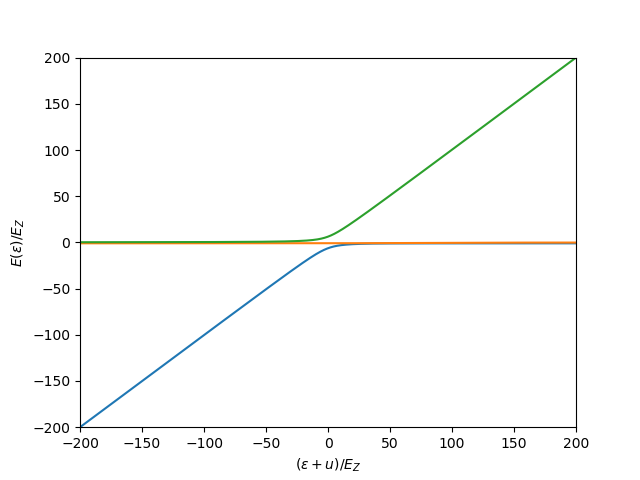

In [31]:
N = 2 ** 15 + 1
limit = 200
eps_vector = np.linspace(-limit, limit, N) * ET - u

parameters = [eps_vector, u, ET, tau, l1, l2]

labels=[r'$(\epsilon+u)/E_Z$',r'$E(\epsilon)/E_Z$']
legend=[r'$S(2,0)$',r'$T_-(1,1)$',r'$S(1,1)$']
# colors=['tab:blue','tab:orange','tab:red','tab:green','tab:purple']

energies, states,fig,ax = compute_eigensystem(parameters, hamiltonian_2QD_1HH_Lowest, plot=True, x_vector=(eps_vector + u) / ET,
                                       normalization=ET, labels=labels)
#modify_plot(ax,fig=fig,figsize=[7,5],x_ticks_vector=np.arange(-limit,limit+1,10))
#fig.tight_layout()

In [9]:
annotation_size=16

ax.text(4.1,3.7,r'$|S(0,2)\rangle$',{'color':'tab:green','fontsize':annotation_size})
ax.text(4.1,0,r'$|S(1,1)\rangle$',{'color':'tab:orange','fontsize':annotation_size})
ax.text(4.1,-1,r'$|T_-(1,1)\rangle$',{'color':'tab:blue','fontsize':annotation_size})

ax.text(-3,-3.5,r'$|S(0,2)\rangle$',{'color':'tab:blue','fontsize':annotation_size})
ax.text(-3.8,0.25,r'$|S(1,1)\rangle$',{'color':'tab:green','fontsize':annotation_size})
ax.text(-3.8,-0.75,r'$|T_-(1,1)\rangle$',{'color':'tab:orange','fontsize':annotation_size})


#lines=ax.lines
#lines[2].set_linestyle('--')
save_figure(fig,'eigenenergies_2QD_2HH_w_SOC',overwrite=False,device='desktop')

()

In [33]:
factors, c_tilde = compute_adiabatic_parameter(eps_vector, states, energies, initial_state=1)
print('c_tilde =', c_tilde)
s, eps_sol = compute_parameters_interpolation(eps_vector, factors, c_tilde)

c_tilde = 1.1043555513923344


<IPython.core.display.Javascript object>


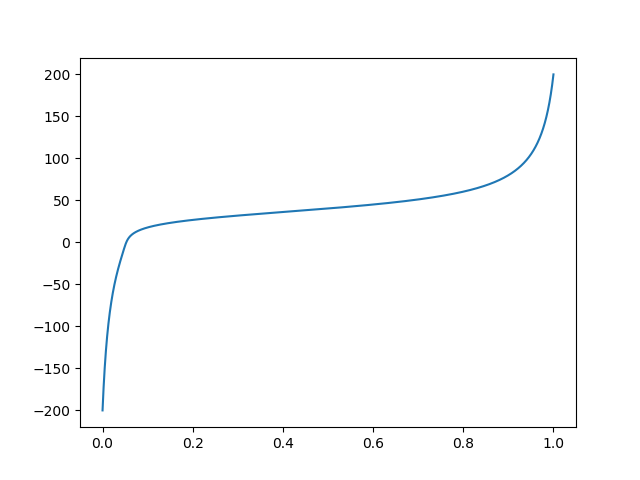

In [34]:
plt.figure()
plt.plot(s,(eps_sol(s)+u)/ET)

<IPython.core.display.Javascript object>


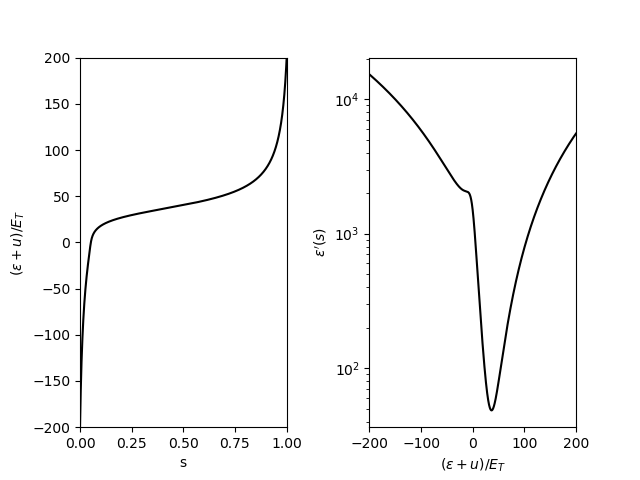

In [35]:
fig, [ax1,ax2] = plt.subplots(ncols=2)

ax1.plot(s, (eps_sol(s) + u) / ET,'k')
ax1.set_xlabel('s')
ax1.set_ylabel(r'$(\varepsilon+u)/E_T$')
ax1.set_xlim([0,1])
ax1.set_ylim([-limit,limit])
#ax1.text(-0.20,4.5,'a)',{'fontsize':15})
# modify_plot(ax1,y_ticks_vector=np.arange(-4,4+1), x_ticks_vector=np.linspace(0,1,5, endpoint=True), label_size=15,
#             tick_label_size=12, lines_width=2)

ax2.plot((eps_sol(s)+u)/ET,np.gradient(eps_sol(s),s),'k')
ax2.set_yscale('log')
ax2.set_xlabel(r'$(\varepsilon+u)/E_T$')
ax2.set_ylabel(r'$\varepsilon^\prime(s)$')
ax2.set_xlim([-limit,limit])
#ax2.text(-5.6,10**3,'b)',{'fontsize':15})
# modify_plot(ax2,fig=fig,x_ticks_vector=np.arange(-4,4+1), figsize=[10,4], label_size=15, tick_label_size=12,lines_width=2)

fig.subplots_adjust(wspace=0.4)

save_figure(fig,'FAQUAD_detuning_2QD_2HH',overwrite=False,device='desktop');

In [36]:
parameters=[eps_sol, u, ET, tau, l1, l2]
T=compute_period(eps_sol,hamiltonian_2QD_1HH_Lowest,parameters,hbar,index=0)
print(T*2*np.pi)

0.9888681198782883


In [37]:
n_tf = 100
tf_vec = np.linspace(0.1, 10, n_tf)
prob=[]


density0 = np.zeros([3, 3], dtype=complex)  # Initialize the variable to save the density matrix+
density0[0, 0] = 1  # Initially the only state populated is the triplet (in our basis the first state)

for i in range(0, n_tf):
    time_step = 1e-3
    time = np.arange(0, tf_vec[i], time_step)  # Time vector in which compute the solution of the population
    _, temp,_ = solve_system(time, density0, [eps_sol, u, ET, tau, l1, l2], hamiltonian_2QD_1HH_Lowest, prob=True,
                                    normalization=tf_vec[i],atol=1e-8, rtol=1e-6 )
    prob.append(temp)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


<IPython.core.display.Javascript object>


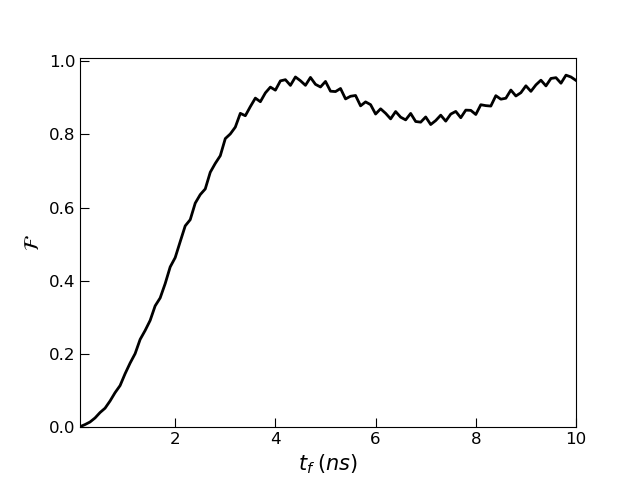

In [38]:
prob_final=np.zeros(n_tf)
for i in range (0, n_tf):
    prob_final[i]=prob[i][-1,1]
    
fig = plt.figure()  # Plot the fidelty to populate the hibrid singlet state
ax = fig.add_subplot(1, 1, 1)
ax.plot(tf_vec, prob_final,'k')
ax.set_xlim(tf_vec[0], tf_vec[-1])
ax.set_ylim(0, 1.01)
ax.set_xlabel(r'$t_f\; (ns)$')
ax.set_ylabel(r'$\mathcal{F}$')
modify_plot(ax, label_size=15, tick_label_size=12, lines_width=2)

save_figure(fig,'FAQUAD_2QD_Results',overwrite=False,device='desktop');

In [39]:
index=np.where(prob_final==np.max(prob_final[0:50]))[0][0] # Index where the maximun fidelity have been reached
print(tf_vec[index]) # Time for the maximun fidelity (ns)
print(prob_final[index])
print(index)

4.3999999999999995
0.957062856206636
43


<IPython.core.display.Javascript object>


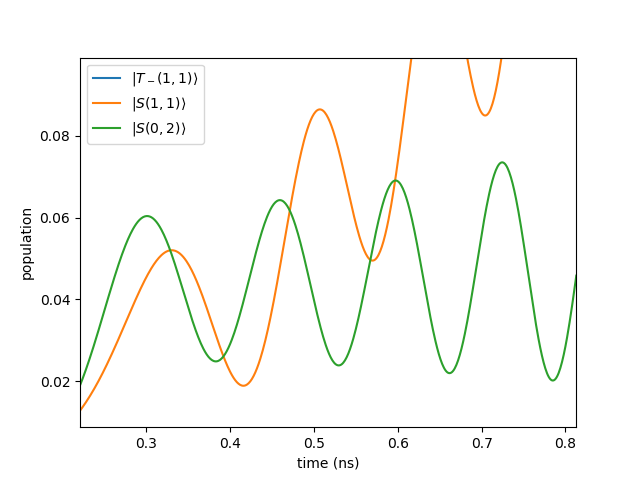

In [41]:
index=39
fig=plt.figure() #Plot the population for each state in terms of time
ax=fig.add_subplot(1,1,1)

t = np.arange(0, tf_vec[index], time_step)
ax.plot(t,prob[index][:,0],label=r'$|T_-(1,1)\rangle$')
ax.plot(t,prob[index][:,1],label=r'$|S(1,1)\rangle$')
ax.plot(t,prob[index][:,2],label=r'$|S(0,2)\rangle$')
ax.legend()
ax.set_xlabel('time (ns)')
ax.set_ylabel('population')
ax.set_xlim([0,t[-1]])
ax.set_ylim([0,1.01])

#modify_plot(ax, label_size=15, tick_label_size=12, lines_width=2, legend=True, legend_size=12)

save_figure(fig,'states_evolution',overwrite=False,device='desktop');

<IPython.core.display.Javascript object>


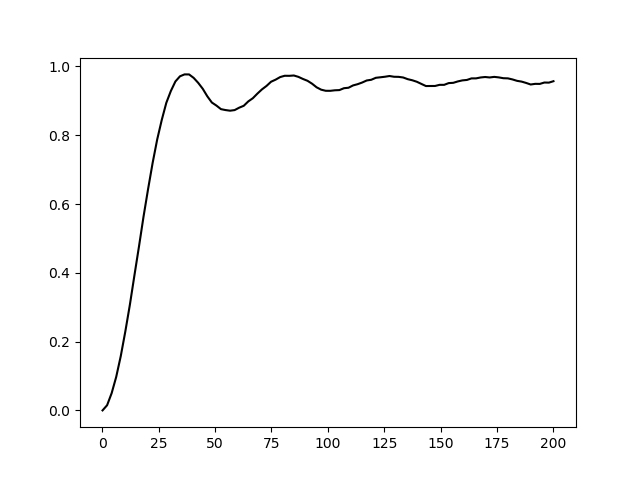

In [25]:
prob_middle=np.zeros(n_tf)
for i in range (0, n_tf):
    prob_middle[i]=np.max(prob[i][:,2])

plt.figure()
plt.plot(tf_vec, prob_middle,'k')

<IPython.core.display.Javascript object>


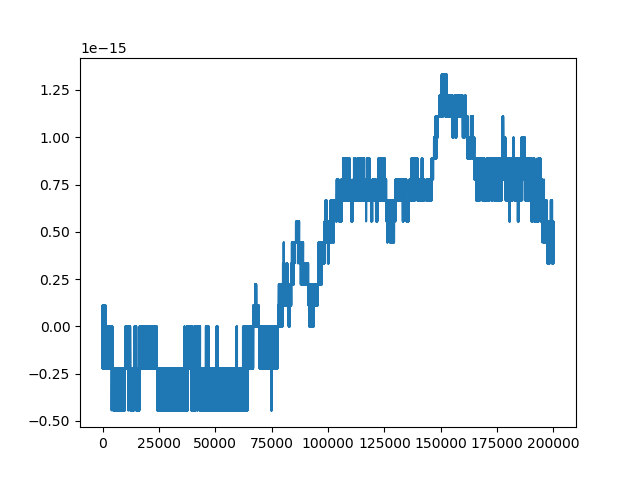

In [26]:
plt.figure()
plt.plot(1-(prob[-1][:,0]+prob[-1][:,1]+prob[-1][:,2]))